In [1]:
import numpy as np
import pandas as pd
import csv
import sklearn.ensemble
import sklearn.neighbors
import sklearn.datasets
import sklearn.cross_validation
import random
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
import sklearn.cross_validation
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import time
import random
from skopt import gp_minimize


/Users/s0c01xa/Desktop/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
mydata=pd.read_csv('/Users/s0c01xa/Documents/Tree_Meta/Data_tree.csv')
xdata=mydata.drop(['y'],axis=1)
ydata=mydata['y']

#xdata




In [13]:
len(xdata.T)
ydata.head(20)
xdata.head()
len(ydata)

1000

In [22]:
#Bayesian Optimization using ACCURACY as the response and hyperparameter optimization

import time
t1=time.time()
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    model=DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
    #model.fit(xdata,ydata)
    
    return (1-np.mean(cross_val_score(model,xdata,ydata,cv=10,scoring='neg_log_loss')))

space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=40,random_state=0)

t2=time.time()
#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun

print (t2-t1)

/Users/s0c01xa/Desktop/anaconda2/lib/python2.7/site-packages/skopt/optimizer/optimizer.py:384: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[1, 100, 23, 'entropy']
1.32844980111
43.5058088303


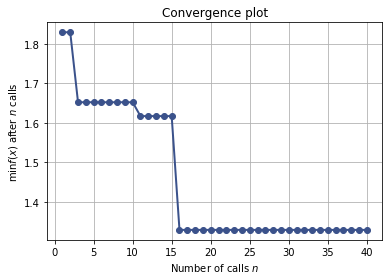

In [23]:
#Convergence Plot for ACCURACY as the response and hyperparameter optimization
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt
plot_convergence(r)
plt.show()

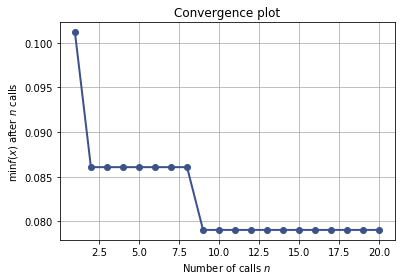

In [12]:
#Convergence Plot for ACCURACY as the response and hyperparameter optimization
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt
plot_convergence(r)
plt.show()

In [13]:
#Bayesian Optimization using F-MEASURE as the response and hyperparameter optimization

import time
t1=time.time()
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    model=DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
    #model.fit(xdata,ydata)
    return (1-np.mean(cross_val_score(model,xdata,ydata,cv=10,scoring='f1')))


space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=11,random_state=0)

t2=time.time()
#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun

print (t2-t1)

[7, 15, 17, 'gini']
0.0800484042102
2.19921517372


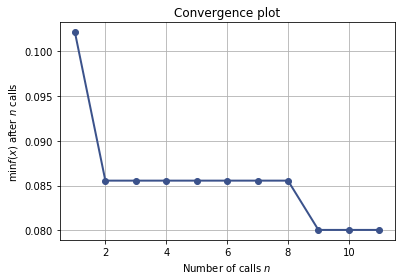

In [14]:
#Convergence Plot for F-MEASURE as the response and hyperparameter optimization
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt
plot_convergence(r)
plt.show()

In [15]:
#Bayesian Optimization using F1_MICRO-MEASURE as the response and hyperparameter optimization

import time
t1=time.time()
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    model=DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
    #model.fit(xdata,ydata)
    return (1-np.mean(cross_val_score(model,xdata,ydata,cv=10,scoring='f1_micro')))


space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=11,random_state=0)

t2=time.time()
#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun

print (t2-t1)

[7, 15, 17, 'gini']
0.0790541054105
2.26915097237


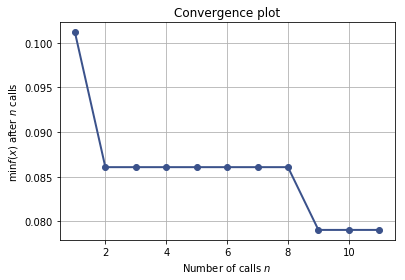

In [16]:
#Convergence Plot for F1-MICRO MEASURE as the response and hyperparameter optimization
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt
plot_convergence(r)
plt.show()

In [49]:
#Bayesian Optimization using F1_MACRO-MEASURE as the response and hyperparameter optimization

import time
t1=time.time()
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    model=DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
    #model.fit(xdata,ydata)
    return (1-np.mean(cross_val_score(model,xdata,ydata,cv=10,scoring='f1_macro')))


space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=11,random_state=0)

t2=time.time()
#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun

print (t2-t1)

[7, 15, 17, 'gini']
0.0790948524702
2.66868209839


In [9]:
#Bayesian Optimization using LOG-LOSS as the response and hyperparameter optimization

import time
t1=time.time()
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    model=DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
    #model.fit(xdata,ydata)
    return (-np.mean(cross_val_score(model,xdata,ydata,cv=10,scoring='neg_log_loss')))


space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=20,random_state=3)

t2=time.time()
#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun

print (t2-t1)

[3, 68, 50, 'gini']
0.265606519555
10.1885938644


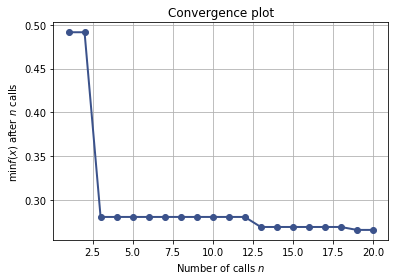

In [10]:
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt
plot_convergence(r)
plt.show()

In [11]:
r

          fun: 0.26560651955519488
    func_vals: array([ 0.49155225,  2.8681011 ,  0.28043102,  0.97141267,  0.78774701,
        1.13535152,  0.93911559,  1.76537694,  1.23299264,  1.10809575,
        0.28153638,  0.3284498 ,  0.26896487,  0.3284498 ,  0.68029046,
        0.27369817,  0.29659238,  0.73839509,  0.26560652,  0.3284498 ])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=218175338), GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=218175338), GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,


In [23]:
#Bayesian Optimization using LOG-LOSS as the response and hyperparameter optimization,increasing the count

import time
t1=time.time()
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    model=DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
    #model.fit(xdata,ydata)
    return (1-np.mean(cross_val_score(model,xdata,ydata,cv=10,scoring='neg_log_loss')))


space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=20,random_state=0)

t2=time.time()
#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun

print (t2-t1)



#In log-loss function the problem is it is not converging at the same number of iteration at the same value.

[1, 100, 23, 'entropy']
1.32844980111
11.5911569595


In [42]:
#Bayesian Optimization using ROC-AUC as the response and hyperparameter optimization,increasing the count

import time
t1=time.time()
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    model=DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
    #model.fit(xdata,ydata)
    return (1-np.mean(cross_val_score(model,xdata,ydata,cv=10,scoring='roc_auc')))


space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=100,random_state=0)

t2=time.time()
#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun

print (t2-t1)

[13, 100, 40, 'gini']
0.0433418087235
99.0474159718


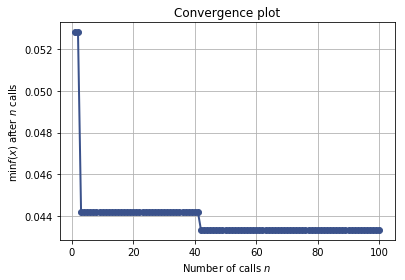

In [43]:
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt
plot_convergence(r)
plt.show()

In [8]:
r

          fun: 0.26560651955519488
    func_vals: array([ 0.49155225,  2.8681011 ,  0.28043102,  0.97141267,  0.78774701,
        1.13535152,  0.93911559,  1.76537694,  1.23299264,  1.10809575,
        0.28153638,  0.3284498 ,  0.26896487,  0.3284498 ,  0.68029046,
        0.27369817,  0.29659238,  0.73839509,  0.26560652,  0.3284498 ])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=218175338), GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=218175338), GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
